## Roll Lathe Swarf Distribution Identification

In [2]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

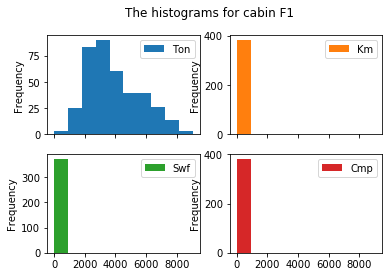

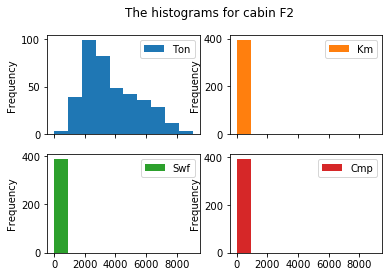

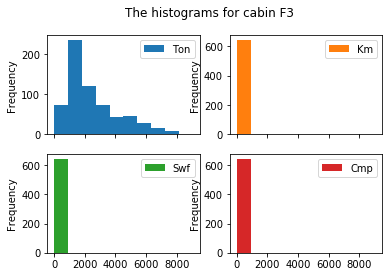

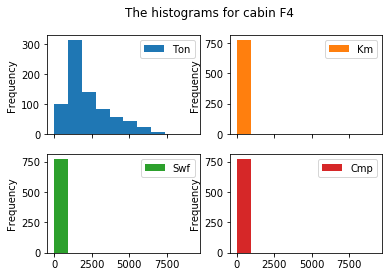

In [88]:
df_copy = df.copy()
df_copy = df_copy[df_copy['Pos'] == df_copy.loc[0, 'Pos']]
for c in set(df_copy.loc[:, 'Cab']):
    tempdf = df_copy[df_copy['Cab']==c]
    tempdf.plot(kind='hist', subplots=True, layout=(2,2), title='The histograms for cabin '+c)
    plt.show()

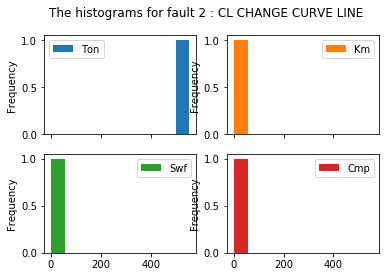

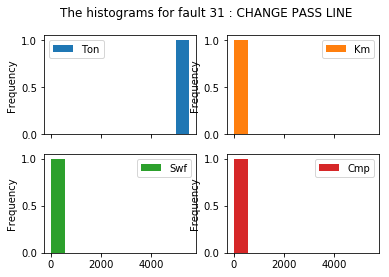

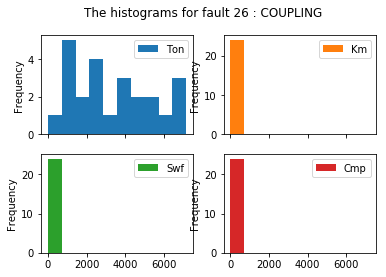

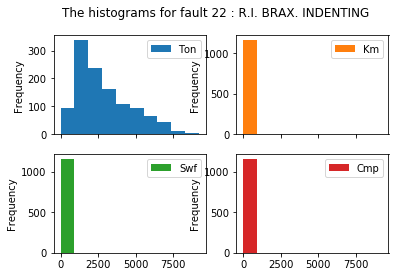

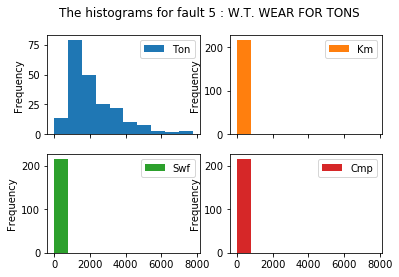

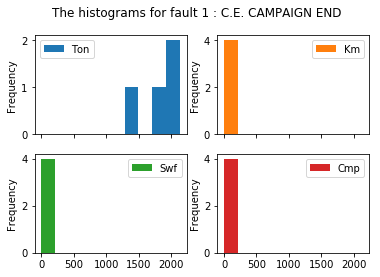

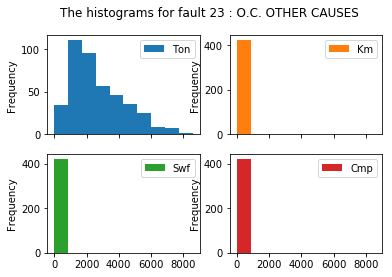

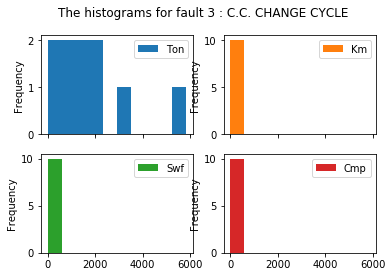

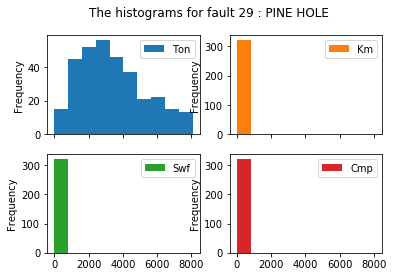

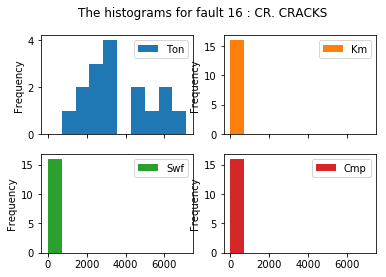

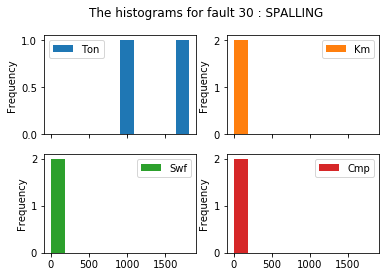

In [89]:
df_copy = df.copy()
df_copy = df_copy[df_copy['Pos'] == df_copy.loc[0, 'Pos']]
for f in set(df_copy.loc[:, 'Flt']):
    df_copy[pd.isnull(df_copy['Flt'])] = '0 : None'
for f in set(df_copy.loc[:, 'Flt']):
    if f == '0 : None':
        continue
    tempdf = df_copy[df_copy['Flt']==f].copy()
    tempdf.plot(kind='hist', subplots=True, layout=(2,2), title='The histograms for fault '+f)
    plt.show()

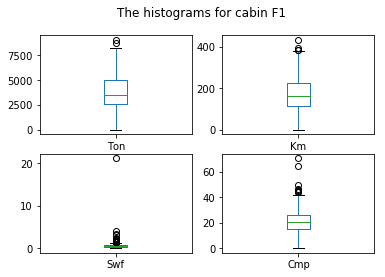

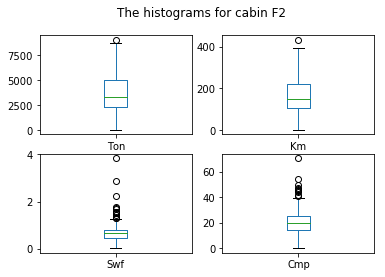

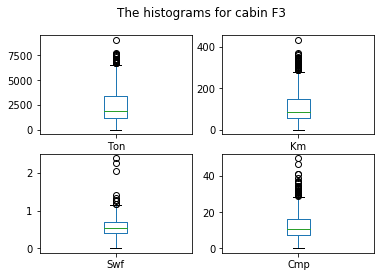

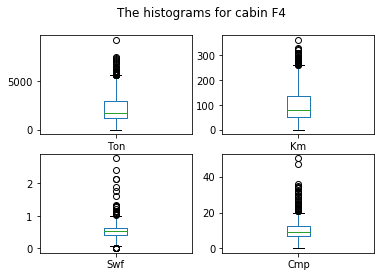

In [86]:
df_copy = df.copy()
df_copy = df_copy[df_copy['Pos'] == df_copy.loc[0, 'Pos']]
for c in set(df_copy.loc[:, 'Cab']):
    tempdf = df_copy[df_copy['Cab']==c]
    tempdf.plot(kind='box', subplots=True, layout=(2,2), title='The histograms for cabin '+c)
    plt.show()

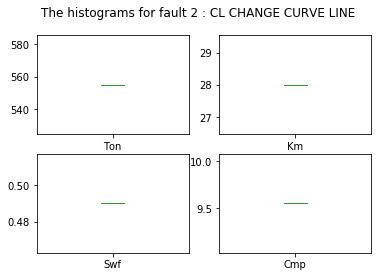

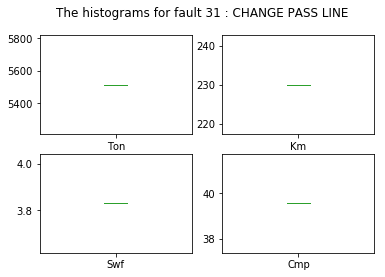

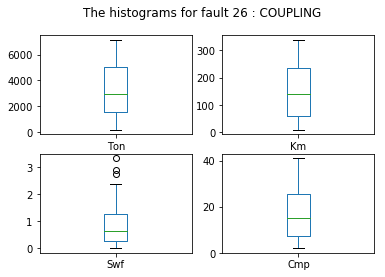

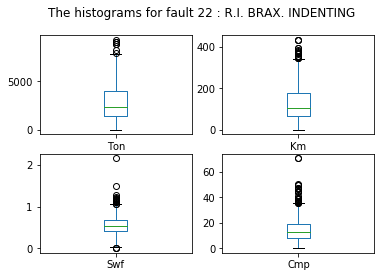

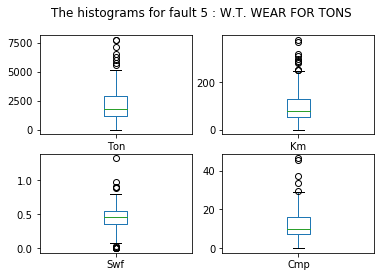

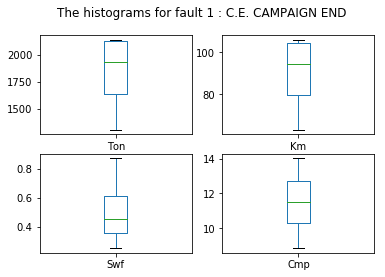

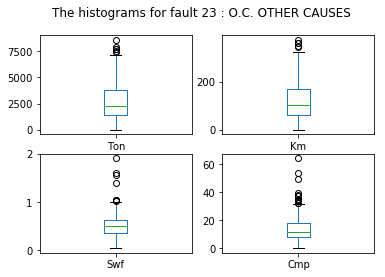

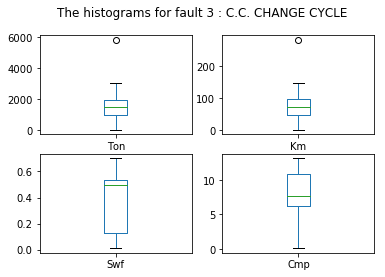

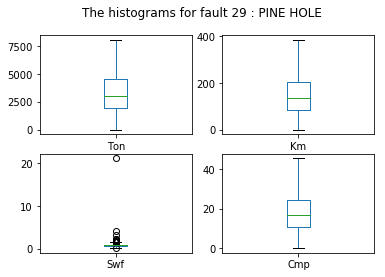

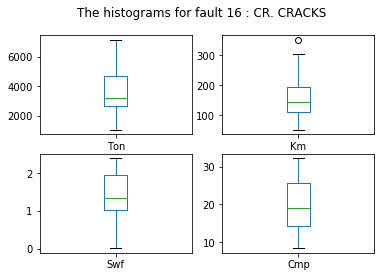

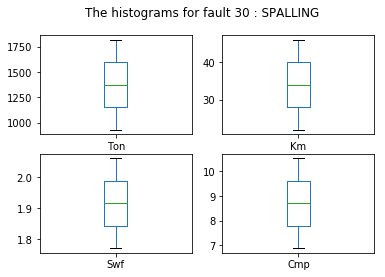

In [90]:
df_copy = df.copy()
df_copy = df_copy[df_copy['Pos'] == df_copy.loc[0, 'Pos']]
for f in set(df_copy.loc[:, 'Flt']):
    df_copy[pd.isnull(df_copy['Flt'])] = '0 : None'
for f in set(df_copy.loc[:, 'Flt']):
    if f == '0 : None':
        continue
    tempdf = df_copy[df_copy['Flt']==f].copy()
    tempdf.plot(kind='box', subplots=True, layout=(2,2), title='The histograms for fault '+f)
    plt.show()

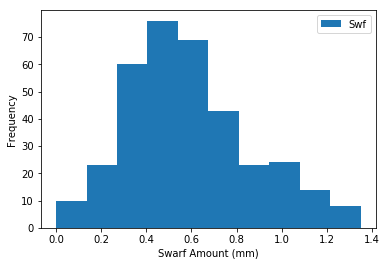

In [180]:
q1 = 0.41
med = 0.57
q3 = 0.8
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df_copy_No_outliers = df_copy[(df_copy['Swf'] < ul) & (df_copy['Swf'] > ll)]
_ = df_copy_No_outliers.plot(kind = 'hist', y='Swf')
plt.xlabel('Swarf Amount (mm)')
plt.show()

In [152]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = np.float(len(data))

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

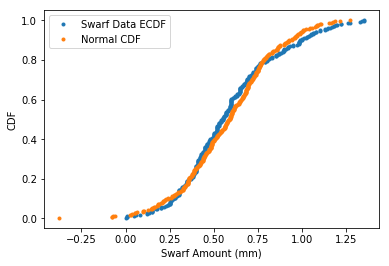

In [179]:
df_copy_No_outliers[np.isnan(df_copy_No_outliers['Swf'])].loc[:, 'Swf'] = 0
data = np.array(df_copy_No_outliers['Swf'].values)
x, y = ecdf(data)
plt.plot(x, y, marker = '.', linestyle = 'none')
n = len(data)
mu = data.mean()
st = data.std()
xn, yn = ecdf(np.random.normal(mu, st, n))
plt.plot(xn, yn, marker = '.', linestyle = 'none')
plt.legend(('Swarf Data ECDF', 'Normal CDF'))
plt.xlabel('Swarf Amount (mm)')
plt.ylabel('CDF')
plt.show()

In [169]:
from scipy import stats

In [170]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.53197772884065297, pvalue=0.0)